<a href="https://colab.research.google.com/github/nazirumar/NLP/blob/main/amazon_fine_food_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First you need to install the opendataset library
**OPendataset Library is library that allow you to download dataset from kaggle **



```
# !pip install opendatasets
```



In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets

In [ ]:
df = opendatasets.download_kaggle_dataset('https://www.kaggle.com/snap/amazon-fine-food-reviews', '/content/drive/MyDrive/NLP')

Skipping, found downloaded files in "/content/drive/MyDrive/NLP/amazon-fine-food-reviews" (use force=True to force download)


Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

**Read Data**

In [2]:
df = pd.read_csv('/content/drive/MyDrive/NLP/amazon-fine-food-reviews/Reviews.csv')
df.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [4]:
df.Summary.head(5)

0    Good Quality Dog Food
1        Not as Advertised
2    "Delight" says it all
3           Cough Medicine
4              Great taffy
Name: Summary, dtype: object

In [5]:
df.Text.head(5)

0    I have bought several of the Vitality canned d...
1    Product arrived labeled as Jumbo Salted Peanut...
2    This is a confection that has been around a fe...
3    If you are looking for the secret ingredient i...
4    Great taffy at a great price.  There was a wid...
Name: Text, dtype: object

**Text preprocessing**

**Import libraries**

In [6]:
from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word

*# Lower casing and removing punctuations*

In [7]:
df['Text'] = df['Text'].apply(lambda x: " ".join(x.lower() for
x in x.split()))
df['Text'] = df['Text'].str.replace('[^\w\s]', "")
df.Text.head(5)

<ipython-input-7-2703e16ea679>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Text'] = df['Text'].str.replace('[^\w\s]', "")


0    i have bought several of the vitality canned d...
1    product arrived labeled as jumbo salted peanut...
2    this is a confection that has been around a fe...
3    if you are looking for the secret ingredient i...
4    great taffy at a great price there was a wide ...
Name: Text, dtype: object

**Removal of stop words**

In [8]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [11]:
stop = stopwords.words('english')
df['Text'] = df['Text'].apply(lambda x: " ".join(x for x in
x.split() if x not in stop))
df.Text.head(5)

0    bought several vitality canned dog food produc...
1    product arrived labeled jumbo salted peanutsth...
2    confection around centuries light pillowy citr...
3    looking secret ingredient robitussin believe f...
4    great taffy great price wide assortment yummy ...
Name: Text, dtype: object

**Spelling correction**

In [10]:
df['Text'] = df['Text'].apply(lambda x: str(TextBlob(x).correct()))
df.Text.head(5)

KeyboardInterrupt: ignored

In [13]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

**Lemmatization**

In [14]:
df['Text'] = df['Text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df.Text.head(5)

0    bought several vitality canned dog food produc...
1    product arrived labeled jumbo salted peanutsth...
2    confection around century light pillowy citrus...
3    looking secret ingredient robitussin believe f...
4    great taffy great price wide assortment yummy ...
Name: Text, dtype: object

**Exploratory data analysis**

Create a new data frame "reviews" to perform exploratory data analysis upon that

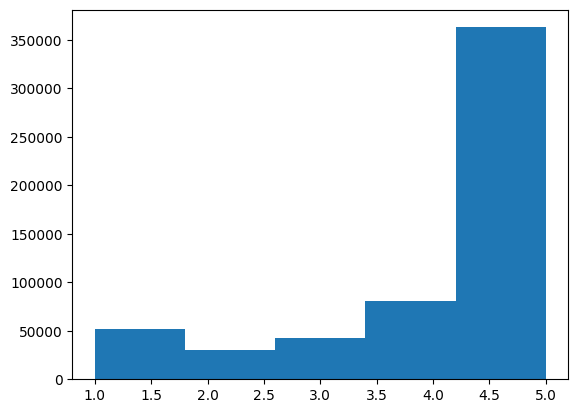

Score
1     52264
2     29743
3     42638
4     80655
5    363111
Name: Id, dtype: int64


In [15]:
reviews = df
# Dropping null values
reviews.dropna(inplace=True)
# The histogram reveals this dataset is highly unbalanced towards high rating.
reviews.Score.hist(bins=5,grid=False)
plt.show()
print(reviews.groupby('Score').count().Id)

# To make it balanced data, we sampled each score by the lowest
n-count from above. (i.e. 29743 reviews scored as '2')

In [17]:
score_1 = reviews[reviews['Score'] == 1].sample(n=29743)
score_2 = reviews[reviews['Score'] == 2].sample(n=29743)
score_3 = reviews[reviews['Score'] == 3].sample(n=29743)
score_4 = reviews[reviews['Score'] == 4].sample(n=29743)
score_5 = reviews[reviews['Score'] == 5].sample(n=29743)

**Here we recreate a 'balanced' dataset.**

In [18]:
reviews_sample = pd.concat([score_1,score_2,score_3,score_4,
score_5],axis=0)
reviews_sample.reset_index(drop=True,inplace=True)

# Printing count by 'Score' to check dataset is now balanced.

In [19]:
print(reviews_sample.groupby('Score').count().Id)

Score
1    29743
2    29743
3    29743
4    29743
5    29743
Name: Id, dtype: int64


**Let's build a word cloud looking at the 'Summary' textt**

In [20]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

1.   ----**Wordcloud function's input needs to be a single string of text.**
2.   ---**Here I'm concatenating all Summaries into a single string**

3.  ---**similarly you can build for Text column**

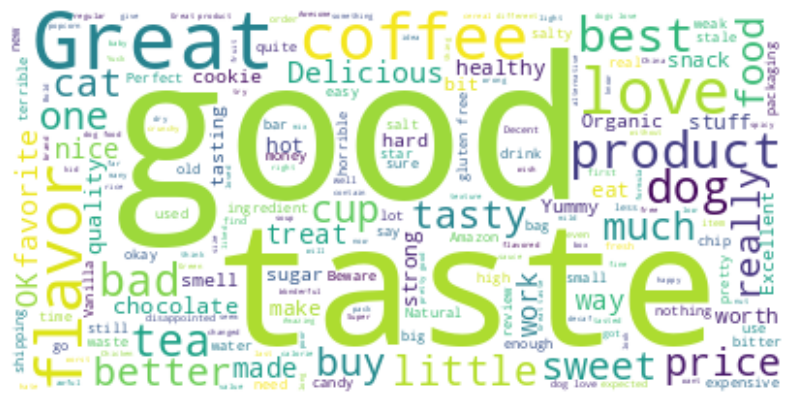

In [21]:
reviews_str = reviews_sample.Summary.str.cat()
worldcloud = WordCloud(background_color='white').generate(reviews_str)
plt.figure(figsize=(10,10))
plt.imshow(worldcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**# Now let's split the data into Negative (Score is 1 or 2) and
Positive (4 or #5) Reviews.**

In [22]:
negative_reviews = reviews_sample[reviews_sample['Score'].
isin([1,2]) ]
positive_reviews = reviews_sample[reviews_sample['Score'].
isin([4,5]) ]

**Transform to single string**

In [23]:
negative_reviews_str = negative_reviews.Summary.str.cat()
positive_reviews_str = positive_reviews.Summary.str.cat()

**Create wordclouds**

In [32]:
wordcloud_negative = WordCloud(background_color='white').generate
(negative_reviews_str)
wordcloud_positive = WordCloud(background_color='white').generate
(positive_reviews_str)

'Really good treats for trainingDogs love itZesty TasteTastyKills molesTasty, but not as soft as I would like.Greasy but tasty beef sticksgreat for school lunchesnot badGood quality food, but Amazon\'s ingredient listing is incorrectI cannot even fathom this productCats Like ItPretty good coffeeNot BadSaeco Vienna worth it if you love coffee!Quick and easy Tea;;Love the productGreat, but 11 of the 12 bags came.My dogs love it!Baby loves it, its a little liquidy thoughGood supplement to fresh fruitNot badI was pleasantly surprisedGluten free - Munch worthy & Crunchy with a hint of sweetness & salt..Popchips Sweet PotatoQuality but Priceygood valueVery Cute, Great for a Gift, the smaller bonsai diedcrunchy goodnessCats seem to like itAbsolutely delicious.Quality Roast, Old Roast DateMakes marvelous mint iced teaLove it except for some brokenPurchased a bag with way too much salt - Company provided a replacement: almonds were perfectGood but really sweetA tasty alternative.Above & BEEyond

In [ ]:
# Plot
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
ax1.imshow(wordcloud_negative,interpolation='bilinear')
ax1.axis("off")
ax1.set_title('Reviews with Negative Scores',fontsize=20)
ax2 = fig.add_subplot(212)
ax2.imshow(wordcloud_positive,interpolation='bilinear')
ax2.axis("off")
ax2.set_title('Reviews with Positive Scores',fontsize=20)
plt.show()

**Feature engineering**
This step is not required as we are not building the model from scratch;
rather we are using the pretrained model from the library vaderSentiment.
If you want to build the model from scratch, you can leverage the
above positive and negative classes created while exploring as a target
variable and then training the model. You can follow the same steps as text
classification explained in Recipe 5-1 to build a sentiment classifier from
scratch.

**Sentiment scores**
*Sentiment Analysis: Pretrained model takes the input from the text
description and outputs the sentiment score ranging from -1 to +1 for each
sentence.*

In [39]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import os
import sys
import ast
plt.style.use('fivethirtyeight')
# Function for getting the sentime

In [ ]:
!pip install vaderSentiment


In [40]:
# Function for getting the sentiment
cp = sns.color_palette()
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [43]:
# Generating sentiment for all the sentence present in the dataset
emptyline=[]
for row in df['Text']:
 vs=analyzer.polarity_scores(row)
 emptyline.append(vs)
# Creating new dataframe with sentiments
# Creating new dataframe with sentiments
df_sentiments=pd.DataFrame(emptyline)
df_sentiments.head(5)

,neg,neu,pos,compound
0,0.000,0.503,0.497,0.9413
1,0.129,0.762,0.110,-0.1027
2,0.130,0.587,0.283,0.8532
3,0.000,0.854,0.146,0.4404
4,0.000,0.369,0.631,0.9468


**Merging the sentiments back to reviews dataframe**

In [46]:
df_c = pd.concat([df.reset_index(drop=True), df_sentiments], axis=1)
df_c.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,neg,neu,pos,compound
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,bought several vitality canned dog food produc...,0.000,0.503,0.497,0.9413
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,product arrived labeled jumbo salted peanutsth...,0.129,0.762,0.110,-0.1027
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",confection around century light pillowy citrus...,0.130,0.587,0.283,0.8532


**Convert scores into positive and negetive sentiments using some threshold**

In [47]:
df_c['Sentiment'] = np.where(df_c['compound'] >= 0 , 'Positive', 'Negative')
df_c.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,neg,neu,pos,compound,Sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,bought several vitality canned dog food produc...,0.000,0.503,0.497,0.9413,Positive
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,product arrived labeled jumbo salted peanutsth...,0.129,0.762,0.110,-0.1027,Negative
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",confection around century light pillowy citrus...,0.130,0.587,0.283,0.8532,Positive
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,looking secret ingredient robitussin believe f...,0.000,0.854,0.146,0.4404,Positive
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,great taffy great price wide assortment yummy ...,0.000,0.369,0.631,0.9468,Positive


**Business insights**

*Let’s see how the overall sentiment is using the sentiment we generated.*

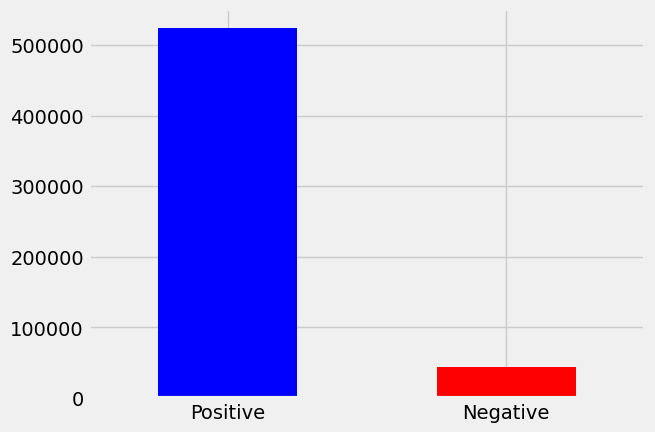

In [59]:
result = df_c['Sentiment'].value_counts()
result.plot(kind='bar', rot=0, color=['b','r']);

We just took a sample of 1000 reviews and completed sentiment
analysis. If you look, more than 900 (>90%) reviews are positive, which is
really good for any business.
We can also group by-products, that is, sentiments by-products to
understand the high-level customer feedback against products

<Axes: xlabel='ProductId'>

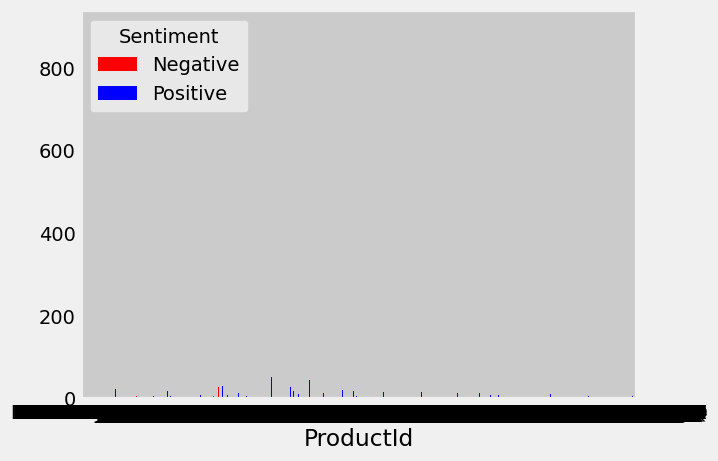

In [60]:
#Sample code snippet
result=df_c.groupby('ProductId')['Sentiment'].value_counts().unstack()
result[['Negative','Positive']].plot(kind='bar', rot=0,color=['r','b'])


Similarly, we can analyze sentiments by month using the time column
and many other such attributes.